# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [132]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw
import pandas as pd

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

**Answer Ex. 11.1.1:**

* As there are two rate compartments you would need two equations. 
$$  \frac{dI}{dt} = \beta SI - \gamma I$$ and $$\frac{dS}{dt} = \gamma I -\beta SI$$ 
where the first equation is a change in the susceptible compartment and the second a change in the infected compartment.

* $\beta$ is the rate of speed of the infection - so the $\beta$ value is a probability value of how fast it would spread from an infected compartment to a susceptible compartment. $\gamma$ is the recovery parameter. 
If the $\gamma$ value is high then there would be a fast recovery, it would tell us something about the survival rate - not much about the disease other than it is easier to get rid of. However, if the $\beta$ value is high then there would be a fast rate of disease spreading and if not contained it could lead to an pandemic.

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

**Answer Ex. 11.1.3:**

1. By playing around with Dirks explorable I found that between 75%-79% would result in around 10 infected individuals when vaccinating with **strategy A**. **Strategy B** would only need around 20% of the population to be vaccinated for an infection level of 10 people. **Strategy C** requires between 55-60% of the population to be vaccinated.

2. **Strategy C** is vaccinating the neighboring node instead of the node itself. This is explained by the Friendship paradox in which your neighbors node degree is on average larger than the average node degree.

3. There is a stronger variation in the BA network compared to an ER network. 

> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

**Answer Ex. 11.1.4:**
    
*Chose explorable 1*. This is a herd immunity simulation where you can choose four different models but all models are SIS models.
It visualizes the effect of a disease spreading in a population of N people where an individual can be susceptible and transmit the disease to other susceptible individuals reaching a situation where the entire population is attacked. However, this is is specified where the infectious indiviudals stay infected for some time but then recover reaching an immunity of sorts ind the end. All transmissions occur face to face. 
The most relevant model is probably a mixture of the dynamic model  and the mixing population model. The dynamic model simulates a population which is connected by links network. Transmissions only occur between linked individuals. However, these links change over time where individuals rearrange their connections which is much like the real world. Eventually the disease will eradicate, but by tuning the vaccine uptake you can control the pace of eradication. The mixing model is where the population is exposed to a lot of random individuals - which e.g. could happen in a supermarket. Again here the play is that eventually the population will reach herd immunity. However, as with SIS models you recover and get susceptible again - which like the flu would make some sense.

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [117]:
G = nx.connected_caveman_graph(10, 5)
# _ = nw.visualize(G) # Uncomment if you want to have a look at the network

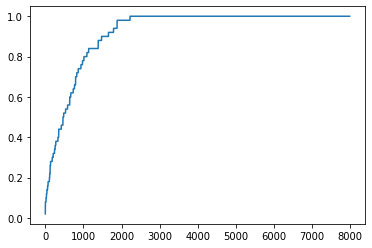

In [118]:
p_I = 0.1 # Choosing probability value at which an infection is likely to happen
n_iter = 200 # Choosing number of times the nodes are able to interact with eachother (number of iterations)

I = set() # Defining the infection compartment
S = set(G.nodes()) # Defining the susceptible compartment

patient0 = np.random.choice(list(S)) # Picking the first infected person which is picked randomly. 

I.add(patient0) # adding the patients with the disease to the infected compartment - starting with patient 0. 
S.remove(patient0) # when the patient is infected the patient will be moved from the susceptible compartment. 

#adding to original code
frac_I = [] #fraction of infected over time 
N = 10*5 # population as found in G

for t in range(n_iter): #the number of times nodes interact
    for infected_node in list(I): #
        neighbors = G.neighbors(infected_node) # a sorting mechanism that checks if the neighbors are infected.
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) #prob of the node itself getting infected by its neighbor is 0.1 
        I |= infected_neighbors # adding patient to infected compartment
        S -= infected_neighbors # removing the infected patient from the list of susceptible
        frac_I.append(len(I)/N) # Store the fraction of infected people
plt.plot(frac_I)


**3. Extended code**

In [125]:
def si(network = G, p_I = 0.1, n_iter = 200):
    
    I = set() 
    S = set(network.nodes())
    frac_I = []
    Time = []
    patient0 = np.random.choice(list(S)) 
    I.add(patient0) 
    S.remove(patient0) 

    for t in range(n_iter):  
        for infected_node in list(I):
            neighbors = network.neighbors(infected_node) 
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) 
            I |= infected_neighbors 
            S -= infected_neighbors
            
        frac_I.append( len(I) / len(network.nodes()) )
        Time.append(t)
    fig = plt.figure(figsize=(10,8))
    color = 'tab:red'
    ax = fig.add_subplot(1,1,1)
    ax.plot(Time, frac_I, color=color)
    ax.set_ylabel('Fraction of infected')
    ax.set_xlabel('Time')
    plt.show()

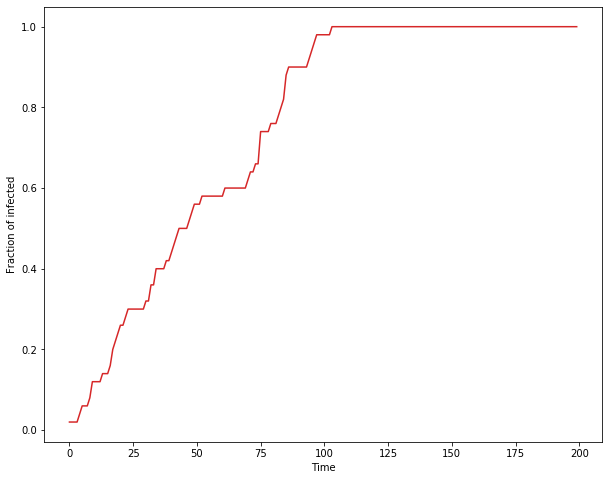

In [126]:
SI()

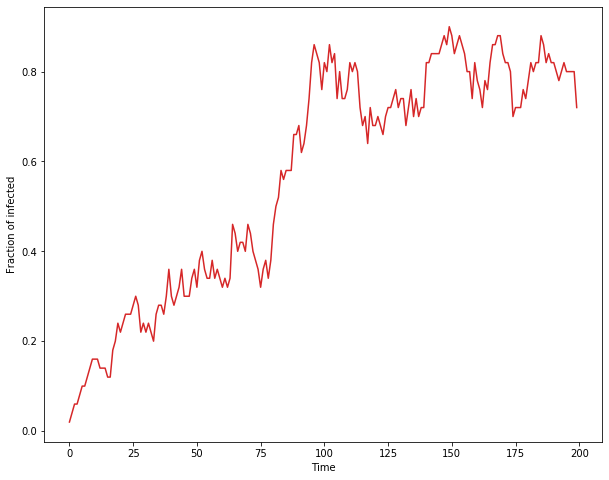

In [135]:
def sis(network = G, p_I = 0.1, t_i = 10, n_iter = 200):
    
    I = set() 
    S = set(network.nodes())
    frac_I = []
    Time = []
    patient0 = np.random.choice(list(S)) 
    I.add(patient0) 
    S.remove(patient0) 
    
    infection_period = dict(zip(list(network.nodes()),np.zeros(len(network.nodes() )) )) #period of days the individual is infected
    
    for t in range(n_iter):  
        for infected_node in list(I):
            neighbors = network.neighbors(infected_node) 
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) 
            I |= infected_neighbors 
            S -= infected_neighbors
            
            if infection_period[infected_node] < t_i:
                    infection_period[infected_node] +=1
            else:
                infection_period[infected_node] = 0
                
                I.remove(infected_node)
                S.add(infected_node)
            
        frac_I.append( len(I) / len(network.nodes()) )
        Time.append(t)
    fig = plt.figure(figsize=(10,8))
    color = 'tab:red'
    ax = fig.add_subplot(1,1,1)
    ax.plot(Time, frac_I, color=color)
    ax.set_ylabel('Fraction of infected')
    ax.set_xlabel('Time')
    plt.show()
sis()

**COMMENT**

As patient get susceptible again you dont get to the point where all are infected at the same time as they move in and out of the susceptible - infection - susceptible nodes.

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [134]:
data = pd.read_csv(
    "facebook-wall.txt.csv",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)


def create_slice(t0,t1,df):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.Graph)
    return G_t

data_sliced = data[:20000]

# Defining time stamps
t0 = data_sliced.timestamp.max() - 86400 * 365
t1 = data_sliced.timestamp.max()            

# Create the `nx.DiGraph`
G_w = create_slice(t0, t1, df=data_sliced)

# Having a look at nodes and edges
print("Nodes: %d Edges: %d" %(len(G_w.nodes), len(G_w.edges)))

Nodes: 5203 Edges: 8628


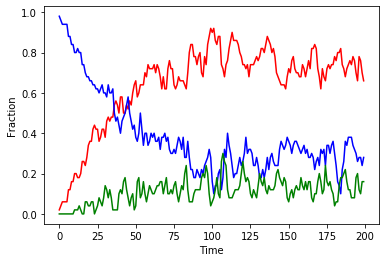

In [151]:
def sirs(network = G, p_I = 0.1, t_i = 10, res_i = 2, n_iter = 200):
    
    I = set() 
    S = set(network.nodes())
    R = set() #resitants nodes
    frac_I = []
    frac_res =[]
    frac_s = []
    Time = []
    patient0 = np.random.choice(list(S)) 
    I.add(patient0) 
    S.remove(patient0) 
    
    infection_period = dict(zip(list(network.nodes()),np.zeros(len(network.nodes() )) ))
    resistant_period = dict(zip(list(network.nodes()),np.zeros(len(network.nodes() )) ))
    
    for t in range(n_iter):  
        for infected_node in list(I):
            neighbors = network.neighbors(infected_node) 
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) 
            I |= infected_neighbors 
            S -= infected_neighbors
            
            if infection_period[infected_node] < t_i:
                    infection_period[infected_node] +=1
            else:
                infection_period[infected_node] = 0
                
                I.remove(infected_node)
                R.add(infected_node)
                
        for res_node in list(R):
            if resistant_period[res_node] < res_i:
                resistant_period[res_node] += 1
            else:
                resistant_period[res_node] = 0
                
                R.remove(res_node)
                S.add(res_node)
                
        frac_I.append( len(I) / len(network.nodes()) )
        frac_s.append( len(S) / len(network.nodes()) )
        frac_res.append( len(R) / len(network.nodes()))
        Time.append(t)
    fig, ax = plt.subplots()
    ax.plot(Time, frac_I, color='r',label = 'I')
    ax.plot(Time, frac_s, color='b',label = 'S')
    ax.plot(Time, frac_res, color='g', label = 'R')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fraction')
    plt.show()
sirs()

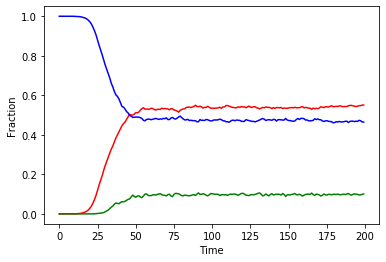

In [161]:
sirs(network = G_w, p_I = 0.1, t_i = 10, res_i = 2, n_iter = 200)

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.